In [ ]:
# !pip install umap-learn
# !pip install isodate

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import umap, isodate
import plotly.express as px
import matplotlib.pyplot as plt
import re

from collections import Counter
from wordcloud import WordCloud
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv('recipes.csv')
df.head()

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09T21:46:00Z,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,NaN,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,39,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29T13:12:00Z,Make and share this Biryani recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_...",...,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,NaN,"c(""Soak saffron in warm milk for 5 minutes and..."
2,40,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05T19:52:00Z,This is from one of my first Good House Keepi...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,NaN,"c(""Into a 1 quart Jar with tight fitting lid, ..."
3,41,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,4 kebabs,"c(""Drain the tofu, carefully squeezing out exc..."
4,42,Cabbage Soup,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19T06:19:00Z,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",...,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,NaN,"c(""Mix everything together and bring to a boil..."


# Clean the data

In [ ]:
df.describe()

,RecipeId,AuthorId,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings
count,522517.000000,5.225170e+05,269294.000000,275028.000000,522517.000000,522517.000000,522517.000000,522517.000000,5.225170e+05,522517.000000,522517.000000,522517.000000,522517.000000,339606.000000
mean,271821.436970,4.572585e+07,4.632014,5.227784,484.438580,24.614922,9.559457,86.487003,7.672639e+02,49.089092,3.843242,21.878254,17.469510,8.606191
std,155495.878422,2.929714e+08,0.641934,20.381347,1397.116649,111.485798,46.622621,301.987009,4.203621e+03,180.822062,8.603163,142.620191,40.128837,114.319809
min,38.000000,2.700000e+01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000
25%,137206.000000,6.947400e+04,4.500000,1.000000,174.200000,5.600000,1.500000,3.800000,1.233000e+02,12.800000,0.800000,2.500000,3.500000,4.000000
50%,271758.000000,2.389370e+05,5.000000,2.000000,317.100000,13.800000,4.700000,42.600000,3.533000e+02,28.200000,2.200000,6.400000,9.100000,6.000000
75%,406145.000000,5.658280e+05,5.000000,4.000000,529.100000,27.400000,10.800000,107.900000,7.922000e+02,51.100000,4.600000,17.900000,25.000000,8.000000
max,541383.000000,2.002886e+09,5.000000,3063.000000,612854.600000,64368.100000,26740.600000,130456.400000,1.246921e+06,108294.600000,3012.000000,90682.300000,18396.200000,32767.000000


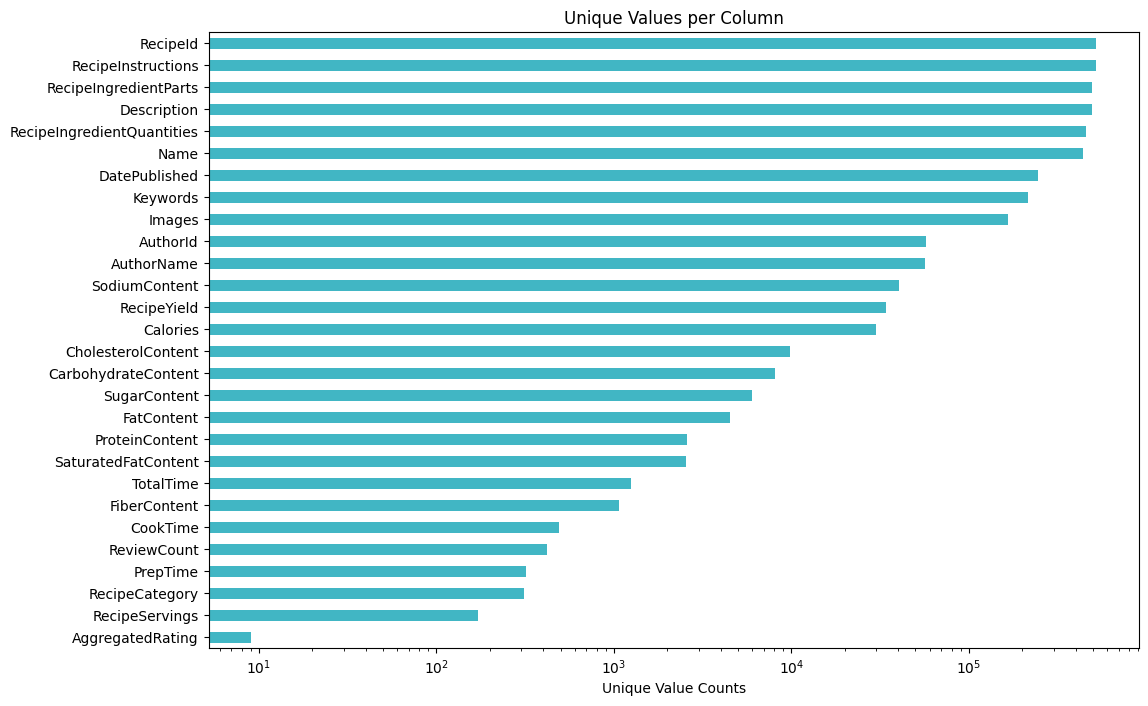

In [ ]:
# Visualize unique value counts
plt.figure(figsize=(12, 8))
df.nunique().sort_values().plot(kind='barh', color='#41b6c4')
plt.xlabel('Unique Value Counts')
plt.title('Unique Values per Column')
plt.xscale('log')  # Use log scale if there are large differences
plt.show()

In [ ]:
df.isnull().sum()

,0
RecipeId,0
Name,0
AuthorId,0
AuthorName,0
CookTime,82545
PrepTime,0
TotalTime,0
DatePublished,0
Description,5
Images,1


In [ ]:
# Data cleaning
data = df.copy()
data.dropna(inplace=True)
data.RecipeServings = pd.to_numeric(data.RecipeServings, errors='coerce')

# Convert ISO 8601 duration to total minutes
def convert_duration(duration):
    duration = duration.lower()
    hours = re.search(r'(\d+)h', duration)
    minutes = re.search(r'(\d+)m', duration)

    total_minutes = 0
    if hours:
        total_minutes += int(hours.group(1)) * 60  # Convert hours to minutes
    if minutes:
        total_minutes += int(minutes.group(1))

    return total_minutes

# Apply the conversion to the CookTime column
data['CookTimeMinutes'] = data['CookTime'].apply(convert_duration)
data['PrepTimeMinutes'] = data['PrepTime'].apply(convert_duration)
data['TotalTimeMinutes'] = data['TotalTime'].apply(convert_duration)
data = data.drop(columns = ['Images', 'AuthorId', 'AuthorName', 'CookTime', 'PrepTime','TotalTime'])

# Split columns based on their nature
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    data[column] = data[column].str.lower()

num_columns = data.select_dtypes(include=['int64', 'float64']).columns
for column in num_columns:
    data[column] = data[column].astype(float)

print("Categorical columns: \n", categorical_columns, "\n")
print("Numerical columns: \n", num_columns, "\n")

data.head()

Categorical columns: 
 Index(['Name', 'DatePublished', 'Description', 'RecipeCategory', 'Keywords',
       'RecipeIngredientQuantities', 'RecipeIngredientParts', 'RecipeYield',
       'RecipeInstructions'],
      dtype='object') 

Numerical columns: 
 Index(['RecipeId', 'AggregatedRating', 'ReviewCount', 'Calories', 'FatContent',
       'SaturatedFatContent', 'CholesterolContent', 'SodiumContent',
       'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent',
       'RecipeServings', 'CookTimeMinutes', 'PrepTimeMinutes',
       'TotalTimeMinutes'],
      dtype='object') 



,RecipeId,Name,DatePublished,Description,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,ReviewCount,...,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions,CookTimeMinutes,PrepTimeMinutes,TotalTimeMinutes
3,41.0,carina's tofu-vegetable kebabs,1999-09-03t14:54:00z,this dish is best prepared a day in advance to...,soy/tofu,"c(""beans"", ""vegetable"", ""low cholesterol"", ""we...","c(""12"", ""1"", ""2"", ""1"", ""10"", ""1"", ""3"", ""2"", ""2...","c(""extra firm tofu"", ""eggplant"", ""zucchini"", ""...",4.5,2.0,...,64.2,17.3,32.1,29.3,2.0,4 kebabs,"c(""drain the tofu, carefully squeezing out exc...",20.0,1440.0,1460.0
5,43.0,best blackbottom pie,1999-08-21t10:35:00z,make and share this best blackbottom pie recip...,pie,"c(""dessert"", ""weeknight"", ""stove top"", ""< 4 ho...","c(""1 1/4"", ""1/4"", ""6"", ""1/3"", ""1/4"", ""1/4"", ""2...","c(""graham cracker crumbs"", ""sugar"", ""butter"", ...",1.0,1.0,...,58.0,1.8,42.5,7.0,8.0,1 9-inch pie,"c(""graham cracker crust: in small bowl, combin...",120.0,20.0,140.0
16,54.0,carrot cake,1999-09-13t15:20:00z,this is one of the few recipes my husband ever...,dessert,"c(""vegetable"", ""weeknight"", ""oven"", ""< 4 hours"")","c(""3"", ""4"", ""1 1/4"", ""2"", ""2"", ""2"", ""2"", ""1"", ...","c(""carrots"", ""eggs"", ""white sugar"", ""all-purpo...",5.0,17.0,...,67.0,1.6,47.9,5.0,12.0,1 bundt,"c(""beat together the eggs, oil, and white suga...",50.0,45.0,95.0
26,64.0,almond pound cake,1999-08-07t16:33:00z,make and share this almond pound cake recipe f...,dessert,"c(""fruit"", ""nuts"", ""weeknight"", ""oven"", ""< 4 h...","c(""2/3"", ""3 1/2"", ""1 1/4"", ""4"", ""2 1/4"", ""5"", ...","c(""butter"", ""almond paste"", ""sugar"", ""eggs"", ""...",4.5,3.0,...,56.0,1.3,29.0,6.9,10.0,1 cake,"c(""preheat oven to 350 degrees fahrenheit."", ""...",60.0,15.0,75.0
54,94.0,blueberry buttertarts,1999-09-12t05:46:00z,make and share this blueberry buttertarts reci...,dessert,"c(""berries"", ""fruit"", ""< 60 mins"", ""oven"")","c(""12"", ""1"", ""1/2"", ""1"", ""3/4"", ""1/3"", ""1"", ""1...","c(""egg"", ""corn syrup"", ""lemon juice"", ""vanilla...",5.0,4.0,...,40.2,1.2,11.5,4.2,12.0,12 tarts,"c(""preheat oven to 375f."", ""leave shells in fo...",25.0,15.0,40.0


In [ ]:
data.columns

Index(['RecipeId', 'Name', 'DatePublished', 'Description', 'RecipeCategory',
       'Keywords', 'RecipeIngredientQuantities', 'RecipeIngredientParts',
       'AggregatedRating', 'ReviewCount', 'Calories', 'FatContent',
       'SaturatedFatContent', 'CholesterolContent', 'SodiumContent',
       'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent',
       'RecipeServings', 'RecipeYield', 'RecipeInstructions',
       'CookTimeMinutes', 'PrepTimeMinutes', 'TotalTimeMinutes'],
      dtype='object')

# Expoloratory Data Analysis

## Ingredient Word Cloud

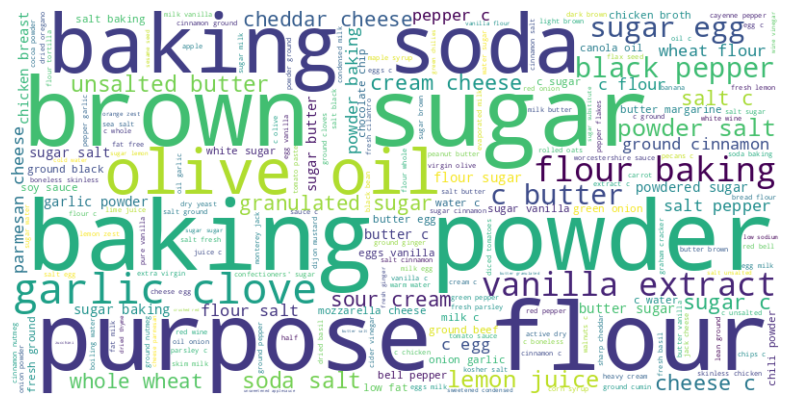

In [ ]:
# Combine all ingredients into a single string
ingredient_text = ' '.join(data['RecipeIngredientParts'])

# Generate and display word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ingredient_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Rating Distribution

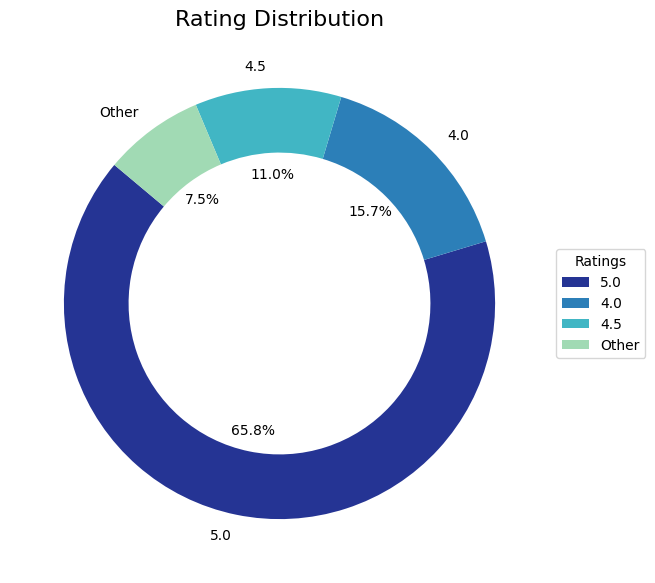

In [ ]:
# Donut chart data
fig, ax = plt.subplots(figsize=(10, 7))
sizes = data['AggregatedRating'].value_counts()
colors = ['#a1dab4', '#41b6c4', '#2c7fb8', '#253494']

# Define a threshold for small values
threshold = 0.05 * sizes.sum()  # 5% threshold
large_slices = sizes[sizes >= threshold]
small_slices = sizes[sizes < threshold]

# Aggregate small slices into "Other"
sizes_grouped = pd.concat([large_slices, pd.Series([small_slices.sum()], index=['Other'])])

# Plot the pie chart
wedges, texts, autotexts = ax.pie(
    sizes_grouped,
    labels=sizes_grouped.index,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops=dict(width=0.3),  # Optional: add a "donut" effect if desired
    colors=colors[::-1] # Use only as many colors as needed
)

# Title and legend
plt.title('Rating Distribution', fontsize=16)
plt.legend(sizes_grouped.index, title="Ratings", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()


## Clustering

In [ ]:
# from sklearn.cluster import DBSCAN
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE

# # Convert keywords into TF-IDF vectors
# vectorizer = TfidfVectorizer()
# keyword_vectors = vectorizer.fit_transform(data['Keywords'])

# # Reduce to 2D with t-SNE
# tsne = TSNE(n_components=2, random_state=42)
# reduced_data = tsne.fit_transform(keyword_vectors.toarray())

# # Create a DataFrame with the reduced data and clusters
# df_plot = pd.DataFrame(reduced_data, columns=['TSNE1', 'TSNE2'])
# df_plot['Cluster'] = data['Cluster']

# # Select only the largest clusters (e.g., top 20)
# top_clusters = df_plot[df_plot['Cluster'] > -1]['Cluster'].value_counts().nlargest(20).index
# df_top_clusters = df_plot[df_plot['Cluster'].isin(top_clusters)]


# # # Fit DBSCAN
# # dbscan = DBSCAN(eps=0.5, min_samples=5)
# # clusters = dbscan.fit_predict(keyword_vectors)

# # # Add clusters to the dataset
# # data['Cluster'] = clusters


# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.figure(figsize=(12, 8))
# sns.scatterplot(data=df_top_clusters, x='TSNE1', y='TSNE2', hue='Cluster', palette='tab20', s=60, alpha=0.6)
# plt.title('Top 20 Largest DBSCAN Clusters (t-SNE)')
# plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.show()



## Nutrition Radar Chart

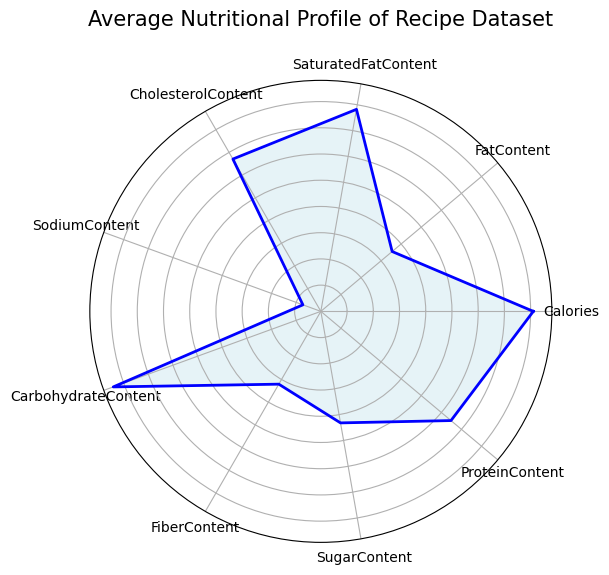

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

nutrition_columns = ['Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent',
                     'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent',
                     'ProteinContent']

# Calculate the mean values for each nutrition metric
average_nutrition = data[nutrition_columns].mean()

# Normalize the average values for better comparison
average_nutrition_normalized = average_nutrition / data[nutrition_columns].max()

# Retrieve the values for the radar chart
categories = list(average_nutrition_normalized.index)
values = average_nutrition_normalized.values

# Complete the loop in the radar chart
values = np.append(values, values[0])
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]

# Plot the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='lightblue', alpha=0.3)
ax.plot(angles, values, color='blue', linewidth=2)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=10)

# Title
plt.title('Average Nutritional Profile of Recipe Dataset', size=15, color='black', y=1.1)
plt.show()


## Time

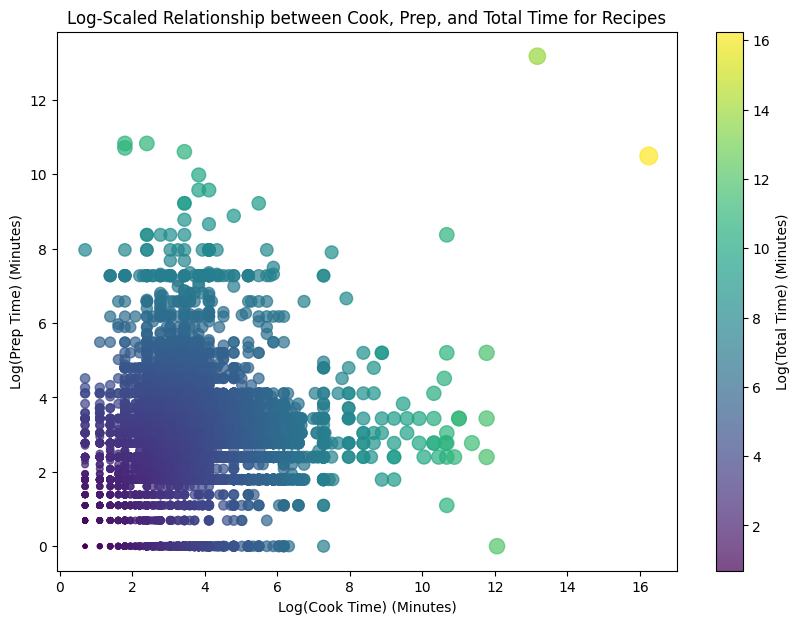

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Handling potential zeros and extreme values with a log scale for better visualization
plt.figure(figsize=(10, 7))

# Apply log scale if necessary
log_cook_time = np.log1p(data['CookTimeMinutes'])  # log(1+x) to avoid log(0) issues
log_prep_time = np.log1p(data['PrepTimeMinutes'])
log_total_time = np.log1p(data['TotalTimeMinutes'])

# Scatter plot
scatter = plt.scatter(log_cook_time, log_prep_time,
                      c=log_total_time, s=log_total_time * 10,  # Adjust bubble size
                      cmap='viridis', alpha=0.7)

# Adding labels and title
plt.xlabel('Log(Cook Time) (Minutes)')
plt.ylabel('Log(Prep Time) (Minutes)')
plt.title('Log-Scaled Relationship between Cook, Prep, and Total Time for Recipes')

# Color bar for total time
colorbar = plt.colorbar(scatter)
colorbar.set_label('Log(Total Time) (Minutes)')

plt.show()


## Timeline of Published Recipes

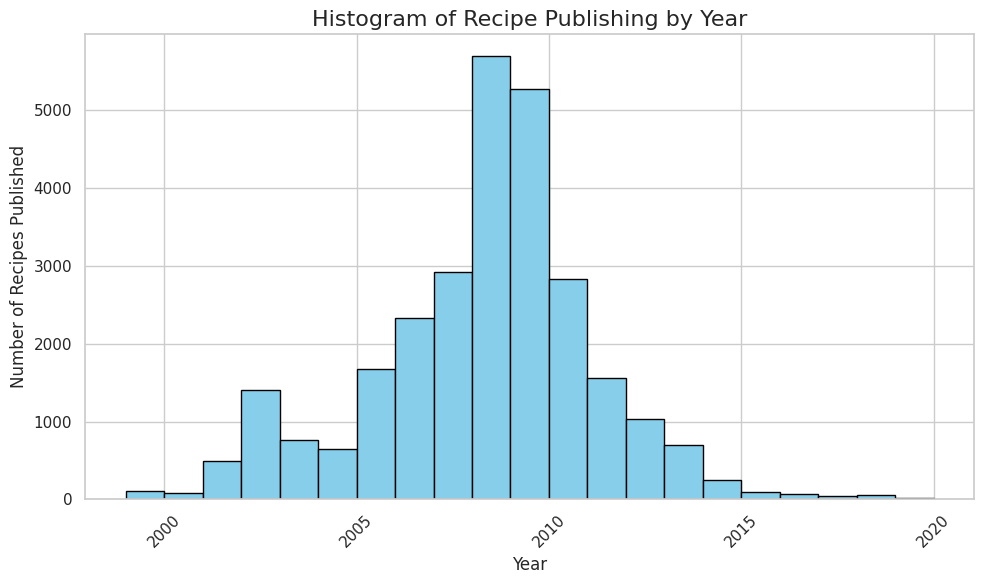

In [ ]:
data['DatePublished'] = pd.to_datetime(data['DatePublished'], errors='coerce')

# Extract the year from DatePublished
data['YearPublished'] = data['DatePublished'].dt.year

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(data['YearPublished'].dropna(), bins=range(int(data['YearPublished'].min()), int(data['YearPublished'].max())+1), color='skyblue', edgecolor='black')
plt.title('Histogram of Recipe Publishing by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Recipes Published', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


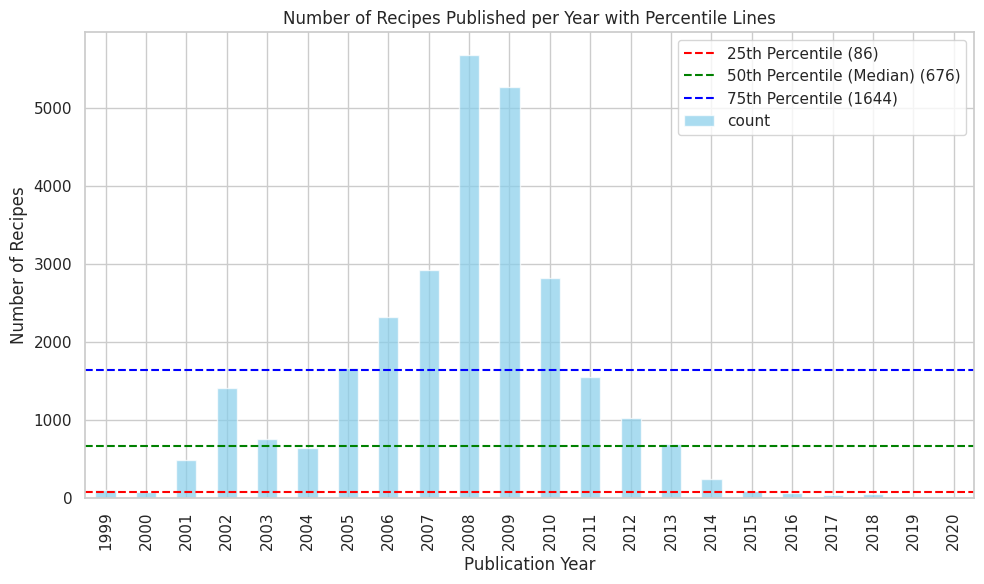

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assume 'data' contains your dataset and 'DatePublished' is in datetime format
data['YearPublished'] = pd.to_datetime(data['DatePublished']).dt.year

# Calculate recipe count per year
year_counts = data['YearPublished'].value_counts().sort_index()

# Calculate percentiles (25th, 50th, 75th)
percentiles = np.percentile(year_counts.values, [25, 50, 75])

# Plotting the bar plot
plt.figure(figsize=(10, 6))
year_counts.plot(kind='bar', color='skyblue', alpha=0.7)

# Overlay percentile lines
plt.axhline(percentiles[0], color='red', linestyle='--', label=f'25th Percentile ({percentiles[0]:.0f})')
plt.axhline(percentiles[1], color='green', linestyle='--', label=f'50th Percentile (Median) ({percentiles[1]:.0f})')
plt.axhline(percentiles[2], color='blue', linestyle='--', label=f'75th Percentile ({percentiles[2]:.0f})')

# Labels and title
plt.xlabel('Publication Year')
plt.ylabel('Number of Recipes')
plt.title('Number of Recipes Published per Year with Percentile Lines')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


## Recipe Ratings vs. Calories

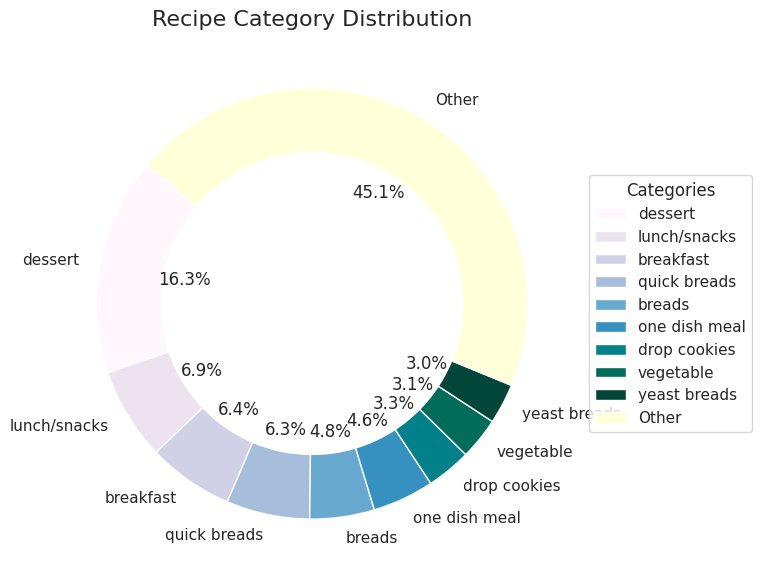

In [ ]:
# Donut chart data
fig, ax = plt.subplots(figsize=(10, 7))
sizes = data['RecipeCategory'].value_counts()

# Keep top 9 categories, rest as "Other"
top_categories = sizes.nlargest(9)
other_categories = sizes[~sizes.index.isin(top_categories.index)].sum()

# Use pd.concat instead of append
sizes_grouped = pd.concat([top_categories, pd.Series([other_categories], index=['Other'])])

# Define colors for 9 categories plus "Other"
# colors = ['#8c510a', '#bf812d', '#dfc27d', '#f6e8c3', '#c7eae5', '#80cdc1', '#35978f', '#01665e']
colors = ['#fff7fb', '#ece2f0', '#d0d1e6', '#a6bddb', '#67a9cf', '#3690c0', '#02818a', '#016c59', '#014636', '#ffffd9']

#d0d1e6
#a6bddb
#67a9cf
#3690c0
#02818a
#016c59
#014636

# Plot the pie chart
wedges, texts, autotexts = ax.pie(
    sizes_grouped,
    labels=sizes_grouped.index,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops=dict(width=0.3),  # Donut effect
    colors=colors
)

# Title and legend
plt.title('Recipe Category Distribution', fontsize=16)
plt.legend(sizes_grouped.index, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()